In [64]:
import cupy as cp
import numpy as np
import time
import math
from importlib.machinery import SourceFileLoader
from scipy.special import erf
import matplotlib.pyplot as plt


In [65]:
def HORNSdini_numpy(m, a, b, csi, shift, sigma, ratio_sigma, fraction_sigma):

    a_new = a
    b_new = b
    B_NEW = (a_new + b_new) / 2.0
    sigma2 = sigma * ratio_sigma

    firstG1 = ((2*(a_new-2*B_NEW+(m-shift))*sigma)/np.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*sigma*sigma)) - (2*(b_new-2*B_NEW+(m-shift))*sigma)/np.exp((b_new-(m-shift))*(b_new-(m-shift))/(2*sigma*sigma))+ np.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma*sigma)*erf((-a_new+(m-shift))/(np.sqrt(2)*sigma))  - np.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma*sigma) * erf((-b_new+(m-shift))/(np.sqrt(2)*sigma)))/(2*np.sqrt(2*math.pi))
    secondG1 = (((2*sigma*(a_new*a_new + B_NEW*B_NEW + a_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(a_new+(m-shift)) + 2*(sigma*sigma)))/np.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*(sigma*sigma))) - (2*sigma*(b_new*b_new + B_NEW*B_NEW + b_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(b_new + (m-shift)) + 2*(sigma*sigma)))/np.exp((b_new - (m-shift))*(b_new - (m-shift))/(2*(sigma*sigma))) - np.sqrt(2*math.pi)*(-((B_NEW - (m-shift))*(B_NEW - (m-shift)) *(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma*sigma))*erf((-a_new + (m-shift))/(np.sqrt(2)*sigma)) + np.sqrt(2*math.pi)* (-((B_NEW - (m-shift))*(B_NEW - (m-shift))*(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma*sigma)) *erf((-b_new + (m-shift))/(np.sqrt(2)*sigma)))/(2 *np.sqrt(2*math.pi)))

    CURVEG1 = np.abs((1-csi)*secondG1 + (b_new*csi - a_new)*firstG1)

    firstG2 = ((2*(a_new-2*B_NEW+(m-shift))*sigma2)/np.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*sigma2*sigma2)) - (2*(b_new-2*B_NEW+(m-shift))*sigma2)/np.exp((b_new-(m-shift))*(b_new-(m-shift))/(2*sigma2*sigma2))+ np.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma2*sigma2)*erf((-a_new+(m-shift))/(np.sqrt(2)*sigma2))  - np.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma2*sigma2) * erf((-b_new+(m-shift))/(np.sqrt(2)*sigma2)))/(2*np.sqrt(2*math.pi))
    secondG2 = (((2*sigma2*(a_new*a_new + B_NEW*B_NEW + a_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(a_new+(m-shift)) + 2*(sigma2*sigma2)))/np.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*(sigma2*sigma2))) - (2*sigma2*(b_new*b_new + B_NEW*B_NEW + b_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(b_new + (m-shift)) + 2*(sigma2*sigma2)))/np.exp((b_new - (m-shift))*(b_new - (m-shift))/(2*(sigma2*sigma2))) - np.sqrt(2*math.pi)*(-((B_NEW - (m-shift))*(B_NEW - (m-shift)) *(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma2*sigma2))*erf((-a_new + (m-shift))/(np.sqrt(2)*sigma2)) + np.sqrt(2*math.pi)* (-((B_NEW - (m-shift))*(B_NEW - (m-shift))*(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma2*sigma2)) *erf((-b_new + (m-shift))/(np.sqrt(2)*sigma2)))/(2 *np.sqrt(2*math.pi)))

    CURVEG2 = np.abs((1-csi)*secondG2 + (b_new*csi - a_new)*firstG2)

    return fraction_sigma*CURVEG1 + (1-fraction_sigma)*CURVEG2

def HORNSdini(m, a, b, csi, shift, sigma, ratio_sigma, fraction_sigma):

    a_new = a
    b_new = b
    B_NEW = (a_new + b_new) / 2.0
    sigma2 = sigma * ratio_sigma

    firstG1 = ((2*(a_new-2*B_NEW+(m-shift))*sigma)/cp.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*sigma*sigma)) - (2*(b_new-2*B_NEW+(m-shift))*sigma)/cp.exp((b_new-(m-shift))*(b_new-(m-shift))/(2*sigma*sigma))+ cp.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma*sigma)*erf((-a_new+(m-shift))/(cp.sqrt(2)*sigma))  - cp.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma*sigma) * erf((-b_new+(m-shift))/(cp.sqrt(2)*sigma)))/(2*cp.sqrt(2*math.pi))
    secondG1 = (((2*sigma*(a_new*a_new + B_NEW*B_NEW + a_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(a_new+(m-shift)) + 2*(sigma*sigma)))/cp.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*(sigma*sigma))) - (2*sigma*(b_new*b_new + B_NEW*B_NEW + b_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(b_new + (m-shift)) + 2*(sigma*sigma)))/cp.exp((b_new - (m-shift))*(b_new - (m-shift))/(2*(sigma*sigma))) - cp.sqrt(2*math.pi)*(-((B_NEW - (m-shift))*(B_NEW - (m-shift)) *(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma*sigma))*erf((-a_new + (m-shift))/(cp.sqrt(2)*sigma)) + cp.sqrt(2*math.pi)* (-((B_NEW - (m-shift))*(B_NEW - (m-shift))*(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma*sigma)) *erf((-b_new + (m-shift))/(cp.sqrt(2)*sigma)))/(2 *cp.sqrt(2*math.pi)))

    CURVEG1 = cp.abs((1-csi)*secondG1 + (b_new*csi - a_new)*firstG1)

    firstG2 = ((2*(a_new-2*B_NEW+(m-shift))*sigma2)/cp.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*sigma2*sigma2)) - (2*(b_new-2*B_NEW+(m-shift))*sigma2)/cp.exp((b_new-(m-shift))*(b_new-(m-shift))/(2*sigma2*sigma2))+ cp.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma2*sigma2)*erf((-a_new+(m-shift))/(cp.sqrt(2)*sigma2))  - cp.sqrt(2*math.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma2*sigma2) * erf((-b_new+(m-shift))/(cp.sqrt(2)*sigma2)))/(2*cp.sqrt(2*math.pi))
    secondG2 = (((2*sigma2*(a_new*a_new + B_NEW*B_NEW + a_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(a_new+(m-shift)) + 2*(sigma2*sigma2)))/cp.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*(sigma2*sigma2))) - (2*sigma2*(b_new*b_new + B_NEW*B_NEW + b_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(b_new + (m-shift)) + 2*(sigma2*sigma2)))/cp.exp((b_new - (m-shift))*(b_new - (m-shift))/(2*(sigma2*sigma2))) - cp.sqrt(2*math.pi)*(-((B_NEW - (m-shift))*(B_NEW - (m-shift)) *(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma2*sigma2))*erf((-a_new + (m-shift))/(cp.sqrt(2)*sigma2)) + cp.sqrt(2*math.pi)* (-((B_NEW - (m-shift))*(B_NEW - (m-shift))*(m-shift)) + (2*B_NEW - 3*(m-shift))*(sigma2*sigma2)) *erf((-b_new + (m-shift))/(cp.sqrt(2)*sigma2)))/(2 *cp.sqrt(2*math.pi)))

    CURVEG2 = cp.abs((1-csi)*secondG2 + (b_new*csi - a_new)*firstG2)

    return (fraction_sigma*CURVEG1 + (1-fraction_sigma)*CURVEG2)


def Gaussian(m, mu, sigma):
    return (cp.exp(-0.5*((m-mu)/sigma)**2))/(sigma*cp.sqrt(2*cp.pi))

def Gaussian_numpy(m, mu, sigma):
    return (np.exp(-0.5*((m-mu)/sigma)**2))/(sigma*np.sqrt(2*np.pi))

def Exponential(m, c):
    return cp.exp(c*m)*len(m)

def array_split(data, batch=None):
    """Split a data array. **batch** is the number of data in a row."""
    if batch is None:
        return [data]
    ret = []
    n_data = data[0].shape[0]
    n_split = (n_data + batch - 1) // batch
    for i in range(n_split):
        tmp = []
        for data_i in data:
            tmp.append(data_i[i * batch : min(i * batch + batch, n_data)])
        ret.append(tmp)
    return ret

In [66]:
config_mass_shape_output = SourceFileLoader('config_mass_shape_output', '/software/pc24403/PCBPGGSZ/outputs/toy/mass_fit/config/%s'%('config_mass_shape_output_1.py')).load_module()
varDict = config_mass_shape_output.getconfig()
Bu_M = cp.linspace(5080, 5800, 1000)
prob = Gaussian(Bu_M, 5275, 30)

In [67]:
def addPdf(pdflist=[], frac=[]):
    pdf = cp.zeros(len(pdflist[0]))

    if len(pdflist) != len(frac):
        if len(frac) ==1:
            pdf = frac[0]*pdflist[0] + (1-frac[0])*pdflist[1]

            return pdf
        else:
            return None and print('The length of the list of pdfs and the list of fractions must be the same')
    
    else:
        for i in range(len(pdflist)):
                pdf += frac[i]*pdflist[i]
        return pdf

In [68]:
print('--- Constructing low-mass pdfs...')
varDict['low_sigma_k_DD'] = varDict['low_sigma_pi_DD']/varDict['low_sigma_pi_over_k_ratio']
varDict['low_sigma_k_LL'] = varDict['low_sigma_pi_LL']/varDict['low_sigma_pi_over_k_ratio']

pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL = HORNSdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])
#pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_DD = HORNSdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_DD'], varDict['low_ratio_pi'], varDict['low_f_pi'])
pdf_Bd_Dstarph_D0pi_DK_Kspipi_LL = HORNSdini(Bu_M, varDict['low_a_Bd_Dstarph_D0pi_dk'], varDict['low_b_Bd_Dstarph_D0pi_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])
#pdf_Bd_Dstarph_D0pi_DK_Kspipi_DD = HORNSdini(Bu_M, varDict['low_a_Bd_Dstarph_D0pi_dk'], varDict['low_b_Bd_Dstarph_D0pi_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_DD'], varDict['low_ratio_pi'], varDict['low_f_pi'])
pdf_Bu_Dstar0h_D0gamma_DK_KsPiPi_LL = HORNSdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0gamma_dk'], varDict['low_b_Bu_Dstar0h_D0gamma_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])
#pdf_Bu_Dstar0h_D0gamma_DK_KsPiPi_DD = HORNSdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0gamma_dk'], varDict['low_b_Bu_Dstar0h_D0gamma_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_DD'], varDict['low_ratio_pi'], varDict['low_f_pi'])
pdf_B2DKpi_1_DK_KsPiPi_LL = HORNSdini(Bu_M, varDict['low_a_B2DKpi'], varDict['low_b_B2DKpi'], varDict['low_csi_B2DKpi'], varDict['low_global_shift'], varDict['low_sigma_B2DKpi'], varDict['low_ratio_B2DKpi'], varDict['low_f_B2DKpi'])
#pdf_B2DKpi_1_DK_KsPiPi_DD = HORNSdini(Bu_M, varDict['low_a_B2DKpi'], varDict['low_b_B2DKpi'], varDict['low_csi_B2DKpi'], varDict['low_global_shift'], varDict['low_sigma_B2DKpi'], varDict['low_ratio_B2DKpi'], varDict['low_f_B2DKpi'])
pdf_B2DKpi_2_DK_KsPiPi_LL = Gaussian(Bu_M, varDict['low_mu_B2DKpi'], varDict['low_sigma_gaus_B2DKpi'])
#pdf_B2DKpi_2_DK_KsPiPi_DD = Gaussian(Bu_M, varDict['low_mu_B2DKpi'], varDict['low_sigma_gaus_B2DKpi'])
pdf_B2DKpi_DK_KsPiPi_LL = addPdf([pdf_B2DKpi_1_DK_KsPiPi_LL, pdf_B2DKpi_2_DK_KsPiPi_LL], [varDict['low_frac_B2DKpi'], 1-varDict['low_frac_B2DKpi']])
#pdf_B2DKpi_DK_KsPiPi_DD = addPdf([pdf_B2DKpi_1_DK_KsPiPi_DD, pdf_B2DKpi_2_DK_KsPiPi_DD], [varDict['low_frac_B2DKpi'], 1-varDict['low_frac_B2DKpi']])


pdf_low_dst2dpi_DK_KsPiPi_LL = addPdf([pdf_Bd_Dstarph_D0pi_DK_Kspipi_LL, pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL], [varDict['low_dk_ratio_Bd_dst_vs_Bu_dst'], 1-varDict['low_dk_ratio_Bd_dst_vs_Bu_dst']])
pdf_low_dk_dst_DK_KsPiPi_LL = addPdf([pdf_Bu_Dstar0h_D0gamma_DK_KsPiPi_LL, pdf_low_dst2dpi_DK_KsPiPi_LL],[varDict['low_dk_ratio_dst2dgam_vs_dst2dk'], 1-varDict['low_dk_ratio_dst2dgam_vs_dst2dk']])


--- Constructing low-mass pdfs...


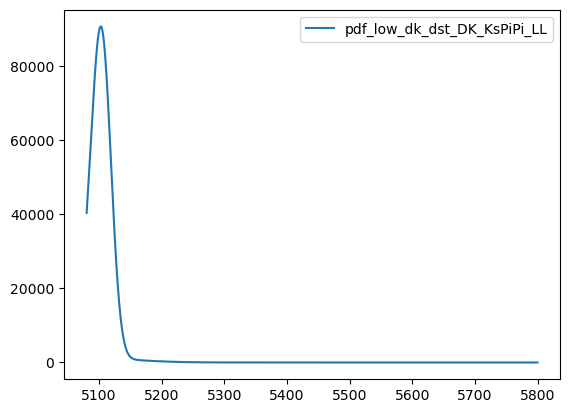

4787371.45294136


In [69]:
#Drew the probability density function
pdf_low_dk_dst_DK_KsPiPi_LL_numpy = cp.asnumpy(pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL)
Bu_m = cp.asnumpy(Bu_M)

plt.plot(Bu_m, pdf_low_dk_dst_DK_KsPiPi_LL_numpy, label='pdf_low_dk_dst_DK_KsPiPi_LL')
plt.legend()
plt.show()
print(sum(pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL))

# Handling the unnormed PDF

In [70]:
def norm_pdf(pdf):
    norm_term = cp.mean(pdf)
    return pdf/norm_term/len(pdf)

In [71]:
norm_pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL = norm_pdf(pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL)

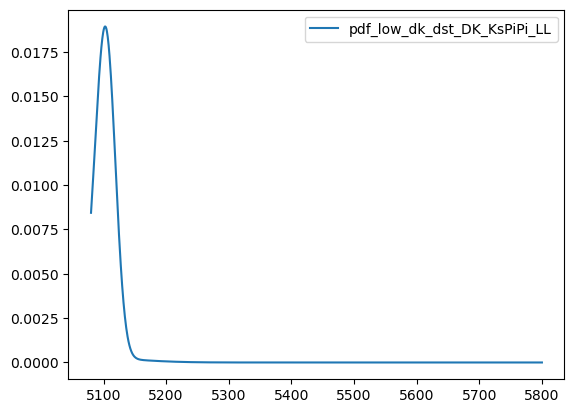

1.0000000000000002


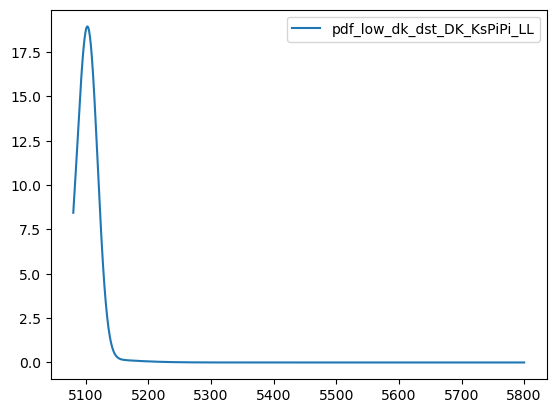

1000.0000000000005


In [72]:
#plot the normalized pdf
plt.plot(Bu_m, norm_pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL.get(), label='pdf_low_dk_dst_DK_KsPiPi_LL')
plt.legend()
plt.show()
print(sum(norm_pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL))

plt.plot(Bu_m, norm_pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL.get()*len(Bu_m), label='pdf_low_dk_dst_DK_KsPiPi_LL')
plt.legend()
plt.show()
print(sum(norm_pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL*len(Bu_m)))

# Generator

In [108]:
#Do the accept an reject method
import random
def accept_reject(pdf, var, n_gen):
    random.seed(time.time())
    seed = random.randint(0, 1e6 - 10)
    cp.random.seed(seed)

    #Generate random numbers with uniform distribution in the range
    max_weight = cp.max(pdf)
    
    print(max_weight)
    x = []

    while len(x) < n_gen:
        x = gen_core(pdf, var, x, max_weight,n_gen)

    return cp.array(x)

def gen_flat_1d(n_gen, range=[5080,5800]):

    random.seed(time.time())
    seed = random.randint(0, 1e6 - 10)
    cp.random.seed(seed)
    n_ori = n_gen*10

    return cp.random.uniform(range[0], range[1], n_ori)

def gen_core(prob_arr, rnd_arr, gen_arr, max_weight, n_gen):
    for i in range(len(rnd_arr)):
        u2 = cp.random.uniform(0, 1)
        if u2 < prob_arr[i]/max_weight:
            gen_arr.append(rnd_arr[i])
            if len(gen_arr) == n_gen:
                break
    return gen_arr

In [109]:
n_gen = 1000

B_M = gen_flat_1d(n_gen)
pdf = HORNSdini(B_M, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])
pdf = norm_pdf(pdf)
gen = accept_reject(pdf, B_M, n_gen)




0.0018434359193887292


1000


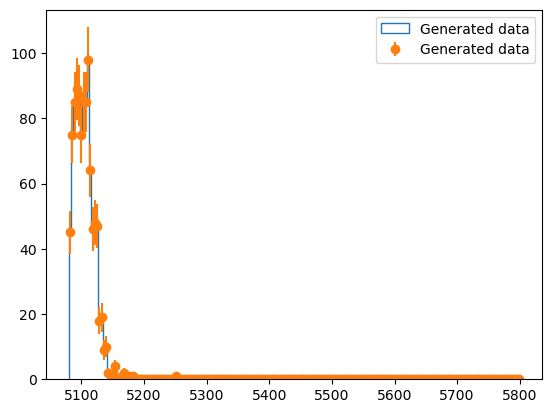

In [110]:
#plot the generated data

plt.hist(gen.get(), bins=200, range=[5080,5800], histtype='step', label='Generated data')
print(len(gen))

#plot with error bars
w, bins = np.histogram(gen.get(), bins=200, range=[5080,5800])
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bin_centers, w, yerr=np.sqrt(w), fmt='o', label='Generated data')
plt.legend()
plt.show()

# Fitted back 

In [111]:
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL


# bin it
w, xe = np.histogram(gen, bins=100, range=[5080,5800])

# compute bin-wise density estimates
werr = w ** 0.5
cx = 0.5 * (xe[1:] + xe[:-1])
d = w 
derr = werr 




# define model and cost function
def model(x, par):
    return par, par*HORNSdini(x, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi']).get()/cp.mean(HORNSdini(x, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])).get()/len(x)


cost = ExtendedUnbinnedNLL(gen, model)

# fit the model
m = Minuit(cost, (100 ))

m.migrad()
m.hesse()





┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2256                       │              Nfcn = 36               │
│ EDM = 9.32e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par  │   1000    │    32     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────┐
│     │   par │
├─────┼───────┤
│ par │ 1e+03 │
└─────┴───────┘

1000


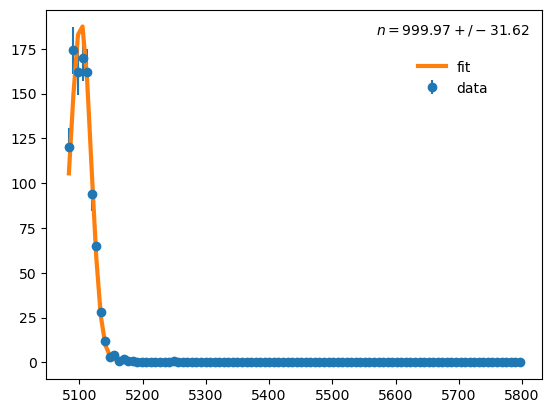

In [112]:
# plot everything
result = m.values
plt.errorbar(cx.get(), w.get(), yerr=derr.get(), fmt="o", label="data")
plt.plot(cx.get(), model(cx, m.values)[1], lw=3,
         label="fit")
plt.legend(frameon=False,
           title=f"$n = {m.values[0]:.2f} +/- {m.errors[0]:.2f}$\n");

print(sum(w))